# 3. Linear Regression – Applied

In [1]:
from pathlib import Path
import pandas as pd
import statsmodels.api  as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats
plt.style.use('classic') # pretty matplotlib plots
sns.set_style(style='white')

warnings.filterwarnings('ignore')

### Q8. This question involves the use of simple linear regression on the Auto data set.

In [4]:
path = Path('Data/Auto.csv')
Auto = pd.read_csv(path)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### **(a)** Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

- i. Is there a relationship between the predictor and the response?
- ii. How strong is the relationship between the predictor and the response?
- iii. Is the relationship between the predictor and the response positive or negative?
- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [6]:
data = Auto[['horsepower', 'mpg']].sort_values('horsepower')
X1 = data['horsepower']
Y = data['mpg']
X = sm.add_constant(X1)

(0.0, 250.0)

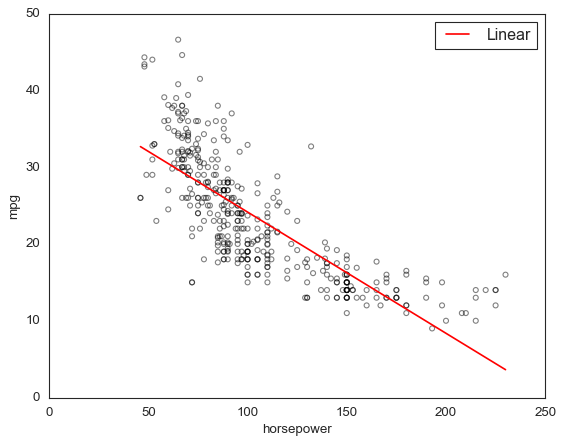

In [7]:
axes = sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')
axes.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
axes.legend()
axes.set_xlim([0, 250])

In [8]:
results = sm.OLS(Y,X).fit()

In [9]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           7.03e-81
Time:                        12:04:03   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Is there a relationship between the predictor and the response? 
> We can answer this question by testing the null hypothesis. 
The p-value corresponding to the F-statistic is very small, indicating a clear evidence of a relationship between mpg and horsepower.

ii. How strong is the relationship between the predictor and the response?
> We can use the residual standard error and the R-squared value for answering this question.
The mean of mpg is 23.5. The RSE of the fit was 4.9 which indicates a percentage error of about 20.9%. 
We may also note that as the R$^2$ is equal to 0.6, almost 60.5948258% of the variability in mpg can be explained 
using horsepower.

>In Python statsmodel we can calculate residual standard error or the residual standard deviation by taking the square root of the scale attribute:
print(np.sqrt(results.scale))
Or we can calculate mannually: 
print(np.sqrt(np.divide(results.ssr, np.subtract(len(Auto), 2))))

iii. Is the relationship between the predictor and the response positive or negative?
>This is can be answered by looking at the plotted regression line or the regression coeficient. 
Since horsepower is negative the relationship is also negative, meaning that more horsepower results in less mpg.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% conﬁdence and prediction intervals?

In [11]:
ex = [1, 98]
pred1 = results.get_prediction(ex).summary_frame(alpha=0.05)
print(f"The predicted mpg associated with {ex[1]} is {pred1['mean'][0]:.2f}.")

The predicted mpg associated with 98 is 24.47.


In [12]:
print(f"The associated confidence and prediction intervals are: [{pred1['mean_ci_lower'][0]:.2f}, {pred1['mean_ci_upper'][0]:.2f}] and [{pred1['obs_ci_lower'][0]:.2f}, {pred1['obs_ci_upper'][0]:.2f}]")

The associated confidence and prediction intervals are: [23.97, 24.96] and [14.81, 34.12]


#### **(b)** Plot the response and the predictor. Use the abline() function to display the least squares regression line.

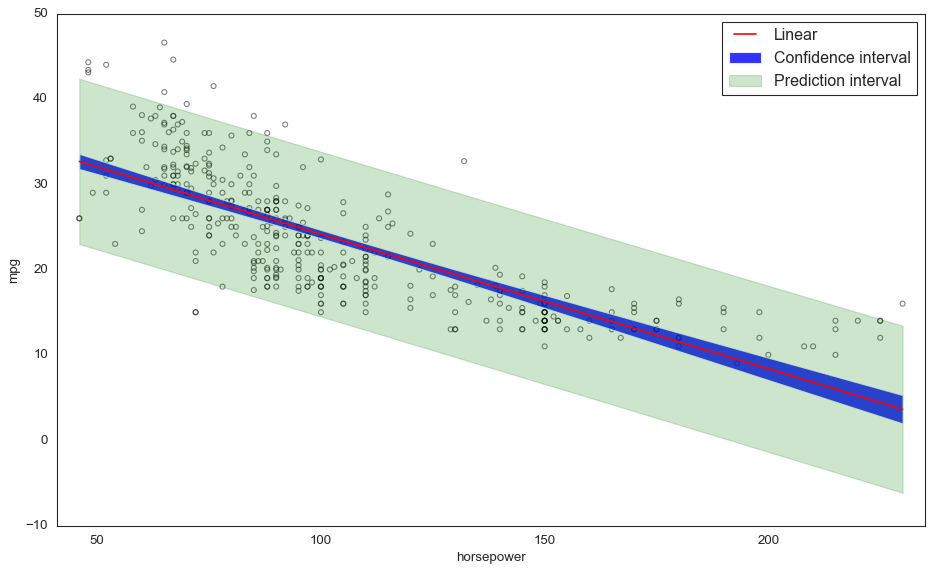

In [13]:
# Plotting the the linear regression with confidence and prediction intervals
pred2 = results.get_prediction(X).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(14,8))
axes = sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')

axes.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
axes.fill_between(X1, pred2['mean_ci_lower'], pred2['mean_ci_upper'], alpha=.8, label='Confidence interval')
axes.fill_between(X1, pred2['obs_ci_lower'], pred2['obs_ci_upper'], alpha=.2, label='Prediction interval', color='green')


axes.set_xlim([X1.min()-5, X1.max()+5])
axes.legend()

#### **(c)** Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

**Regression assumptions**
Linear regression makes several assumptions about the data, such as :

* Linearity of the data. The relationship between the predictor (x) and the outcome (y) is assumed to be linear.
* Normality of residuals. The residual errors are assumed to be normally distributed.
* Homogeneity of residuals variance. The residuals are assumed to have a constant variance (homoscedasticity)
* Uncorrelated residuals.

In [147]:
def diagnostic_plots(results):
    fitted_values = results.fittedvalues
    residuals = results.resid
    studentized_residuals = results.get_influence().resid_studentized_external
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(studentized_residuals))
    # leverage, from statsmodels internals
    model_leverage = results.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = results.get_influence().cooks_distance[0]


    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(14, 14))

    # Residual vs Fitted
    sns.regplot(fitted_values, residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax1);

    ax1.scatter(fitted_values, residuals, alpha=0.5);
    ax1.set_title('Residuals vs Fitted')
    ax1.set_xlabel('Fitted values')
    ax1.set_ylabel('Residuals');

    # Q-Q plot
    QQ = ProbPlot(studentized_residuals)
    QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1, ax=ax2)
    ax2.set_title('Normal Q-Q')
    ax2.set_xlabel('Theoretical Quantiles')
    ax2.set_ylabel('Sample Quantiles');

    # Scale-location
    sns.regplot(fitted_values, model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax3);
    ax3.scatter(fitted_values, model_norm_residuals_abs_sqrt, alpha=0.5);
    ax3.set_title('Scale-Location')
    ax3.set_xlabel('Fitted values')
    ax3.set_ylabel('$\sqrt{|Standardized Residuals|}$');

    # Residuals vs Leverage
    sns.regplot(model_leverage, studentized_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax4);

    ax4.scatter(model_leverage, studentized_residuals, alpha=0.5);
    ax4.axhline(y=3, color='red', linestyle='--')
    ax4.axhline(y=-3, color='red', linestyle='--')
    ax4.set_title('Residuals vs Leverage')
    ax4.set_xlabel('Leverage')
    ax4.set_ylabel('Studentized Residuals');


    fig.tight_layout()
    plt.show()


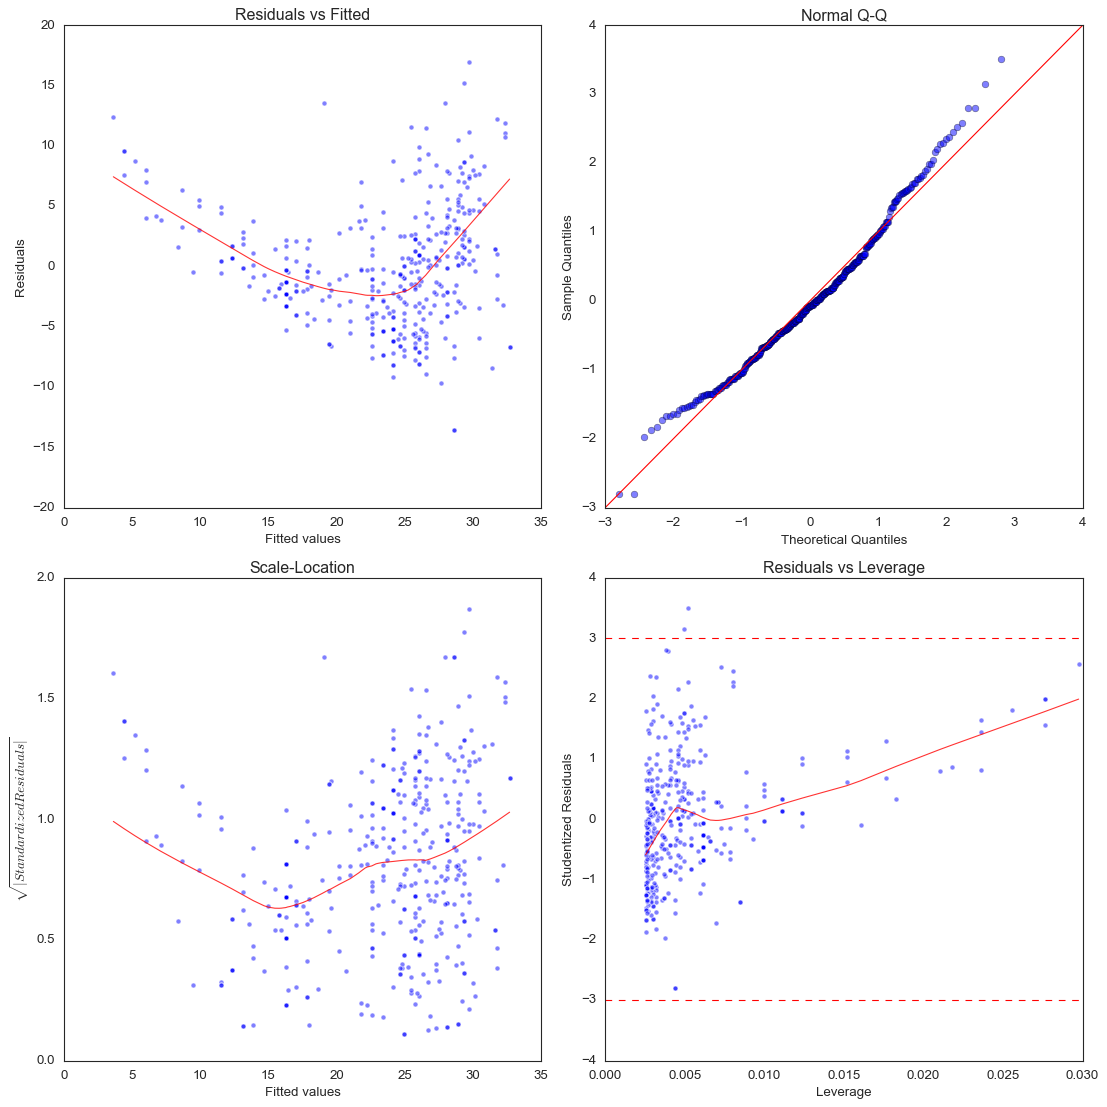

In [15]:
diagnostic_plots(results)

The diagnostic plots show residuals in four different ways:

* **Residuals vs Fitted:** used to check the linear relationship assumptions. A horizontal line, without distinct patterns is an indication for a linear relationship, what is good. Also if a funnel shape can be identified in the distribution of the residuals, than heteroskedasticity (non-constant variance of residuals) may be present.

* **Normal Q-Q:** used to examine whether the residuals are normally distributed. It’s good if residuals points follow the straight dashed line.

* **Scale-Location (or Spread-Location):** used to check the homogeneity of variance of the residuals (homoscedasticity). Horizontal line with equally spread points is a good indication of homoscedasticity.

* **Residuals vs Leverage:** used to identify influential cases, that is extreme values that might influence the regression results when included or excluded from the analysis. This plot will be described further in the next sections.

**Interpretation:**

* The residual vs fitted plot clearly shows the violation of the linear assumption. The model unable to capture the non-linear behavior of the data. Also, a funnel shape is evident in the plot, which suggest non constant variance i.e. heteroskedasticity.
* Based on the Q-Q plot, which follows a roughly straight line, the normal distribution can be assumed.
* The heteroskedasticity can be identified with the scale-location plot too.
* Outliers and high leverage points can be identified using the residula vs leverage plot. Points with absolute studentized residual value greater, than 3 may be considered as an outlier (in this case, two datapoints may be outliers). High leverage points appear at the far right side of the plot. Also, few high leverage points can be identified in the example.

### Q9. This question involves the use of multiple linear regression on the Auto data set.

#### **(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

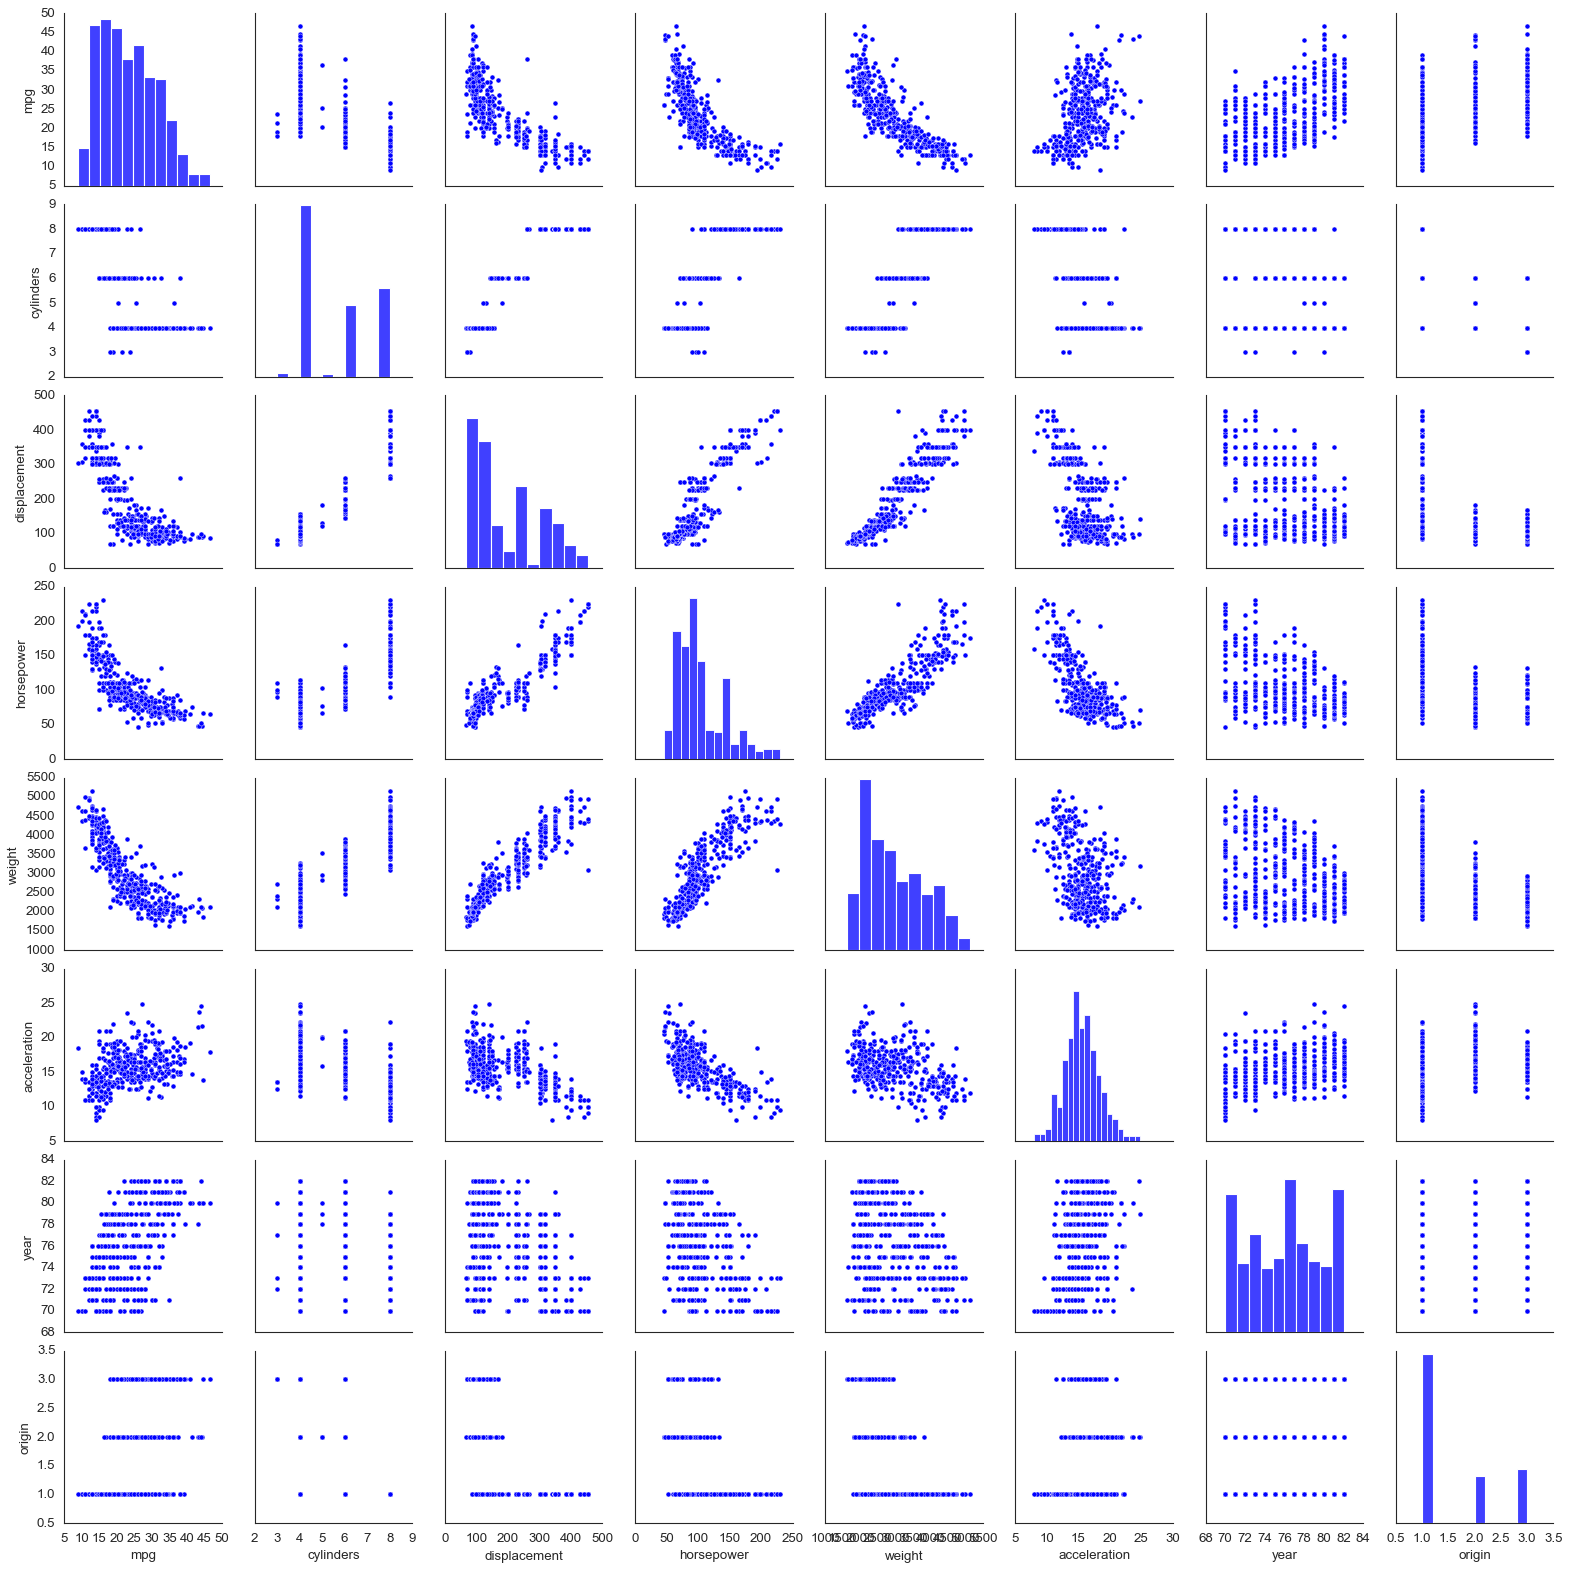

In [16]:
sns.pairplot(Auto);

#### **(b)** Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [17]:
corrM = Auto.drop(['name'], axis=1).corr()
corrM.style.background_gradient(cmap='coolwarm').set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


#### (c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

1. Is there a relationship between the predictors and the response?
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the year variable suggest?

In [107]:
data = Auto.drop(['name'], axis=1)
X1 = data.drop(['mpg'], axis=1)
Y = data['mpg']
X = sm.add_constant(X1)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          2.04e-139
Time:                        13:43:35   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that displacement, weight, year and origin hasve sufficiently low p-values. However the correlation plot suggest high correlation among some predictor variables (e.g. displacement ~ weight, displacement ~ cylinders, cylinders ~ horsepower), which may result to mullticollinearity. We can further prove this by calculating the variance inflation factor. But first the predictor values must be centered or standardized.

In [108]:
def centerize(series):
    return (series - series.mean())

def standardize(series):
    return (series - series.mean()) / series.std()

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculating the centerized values, origin is dropped, because it is practically a categorical variable
X1 = data.drop(['mpg', 'origin'], axis=1)
X1[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']] = centerize(X1[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])

# Creating a dataframe of Variance inflation factors
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif

,VIF Factor,features
0,10.630874,cylinders
1,19.535261,displacement
2,8.916923,horsepower
3,10.430838,weight
4,2.609517,acceleration
5,1.000460,year


In practice, variables with VIF higher than 5 is considered highly correlated with the other predictors. Here, displacement has the highest VIF, also the correlation matrix suggest this. Let's fit the model again, without the displacement variable. Ofcourse, in our dataset, it is evident, that cylinders, horsepower, weight and displacement are extremely correlated with each other. In the followings I will drop displacement as it has the highest VIF score.

In [110]:
# Calculating the centerized values, origin is dropped, because it is practically a categorical variable
X1 = X1.drop(['displacement'], axis=1)
# Creating a dataframe of Variance inflation factors
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif

,VIF Factor,features
0,5.815845,cylinders
1,8.306405,horsepower
2,8.449841,weight
3,2.580328,acceleration
4,1.000450,year


In [111]:
# Fitting the model without the displacement parameter
Y = Auto['mpg']
# Adding the origin variable ad a constant
X1['origin'] = Auto['origin']
X = sm.add_constant(X1)

results_ml = sm.OLS(Y, X).fit()
results_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     288.8
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          3.67e-139
Time:                        13:43:37   Log-Likelihood:                -1027.0
No. Observations:                 392   AIC:                             2068.
Df Residuals:                     385   BIC:                             2096.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -34.7936      3.907     -8.906      0.000     -42.475     -27.112
cylinders        0.0746      0.244      0.306      0.760      -0.405       0.554
horsepower      -0.0062      0.013     -0.470      0.638      -0.032       0.020
weight          -0.0058      0.001     -9.580      0.000      -0.007      -0.005
acceleration     0.0538      0.099      0.543      0.587      -0.141       0.249
year             0.7418      0.051     14.472      0.000       0.641       0.843
origin           1.1927      0.266      4.487      0.000       0.670       1.715
==============================================================================
Omnibus:                       35.452   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.984
Skew:                           0.562   Prob(JB):                     3.47e-14
Kurtosis:                       4.591   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictor and the response? 
> We can answer this question by testing the null hypothesis. The p-value corresponding to the F-statistic is very small, indicating a clear evidence of a relationship between the predictors and the response variables.

ii. Which predictors appear to have a statistically significant relationship to the response?
> weight, year and origin variables have p-values less than 0.05, which means they are statistically significant.

iii. What does the coefficient for the year variable suggest?
> The coefficient ot the year variable suggests that the average effect of an increase of 1 year is an increase of 0.74 in mpg (all other predictors remaining constant). In other words, cars become more fuel efficient every year by almost 0.75 mpg / year.

#### (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [112]:
fitted_values_ml = results_ml.fittedvalues
residuals_ml = results_ml.resid
studentized_residuals_ml = results_ml.get_influence().resid_studentized_external
model_norm_residuals_abs_sqrt_ml = np.sqrt(np.abs(studentized_residuals_ml))
# leverage, from statsmodels internals
model_leverage_ml = results_ml.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks_ml = results_ml.get_influence().cooks_distance[0]

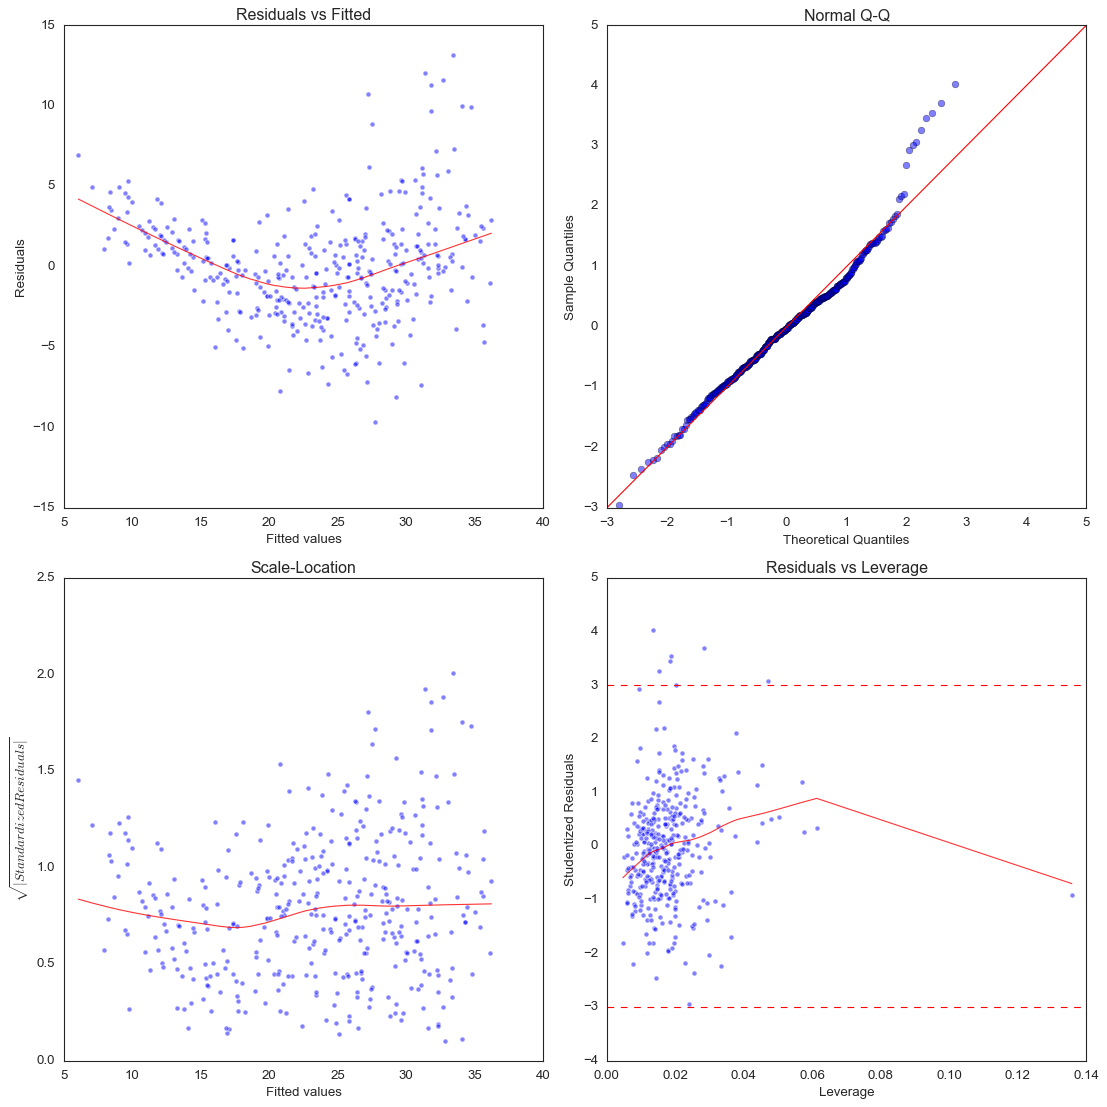

In [113]:
diagnostic_plots(results_ml)

**Interpretation:**

* The residual vs fitted plot clearly shows the violation of the linear assumption. The model unable to capture the non-linear behavior of the data. Also, a funnel shape is evident in the plot, which suggest non constant variance i.e. heteroskedasticity. Although, the multiple linear model suggest much better fit, than the single predictor model.
* Based on the Q-Q plot, which follows a roughly straight line, the normal distribution can be assumed.
* The scale-location plot suggest minimal heteroscedasticity.
* Outliers and high leverage points can be identified using the residula vs leverage plot. Points with absolute studentized residual value greater, than 3 may be considered as an outlier (in this case, fwe datapoints may be outliers). High leverage points appear at the far right side of the plot. One high leverage point can be identified.

#### (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
& 
#### (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

Based on the results of exercire (c) I will use weight, origin, and their interaction terms as predictors.

In [114]:
X['weight*horsepower'] = X['weight']*X['horsepower']
X['weight*year'] = X['weight']*X['year']
X = X.drop(['acceleration', 'cylinders'], axis=1)
Y = np.log(Y)

In [115]:
results_int = sm.OLS(Y, X).fit()
results_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     516.2
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          1.16e-180
Time:                        13:43:44   Log-Likelihood:                 298.76
No. Observations:                 392   AIC:                            -583.5
Df Residuals:                     385   BIC:                            -555.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7575      0.142      5.318      0.000       0.477       1.037
horsepower           -0.0020      0.000     -5.745      0.000      -0.003      -0.001
weight               -0.0002      0.000     -0.809      0.419      -0.001       0.000
year                  0.0298      0.002     16.001      0.000       0.026       0.034
origin                0.0238      0.009      2.627      0.009       0.006       0.042
weight*horsepower  1.224e-06   2.24e-07      5.470      0.000    7.84e-07    1.66e-06
weight*year       -1.181e-06   2.53e-06     -0.468      0.640   -6.15e-06    3.79e-06
==============================================================================
Omnibus:                        5.248   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                6.944
Skew:                          -0.062   Prob(JB):                       0.0311
Kurtosis:                       3.640   Cond. No.                     1.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

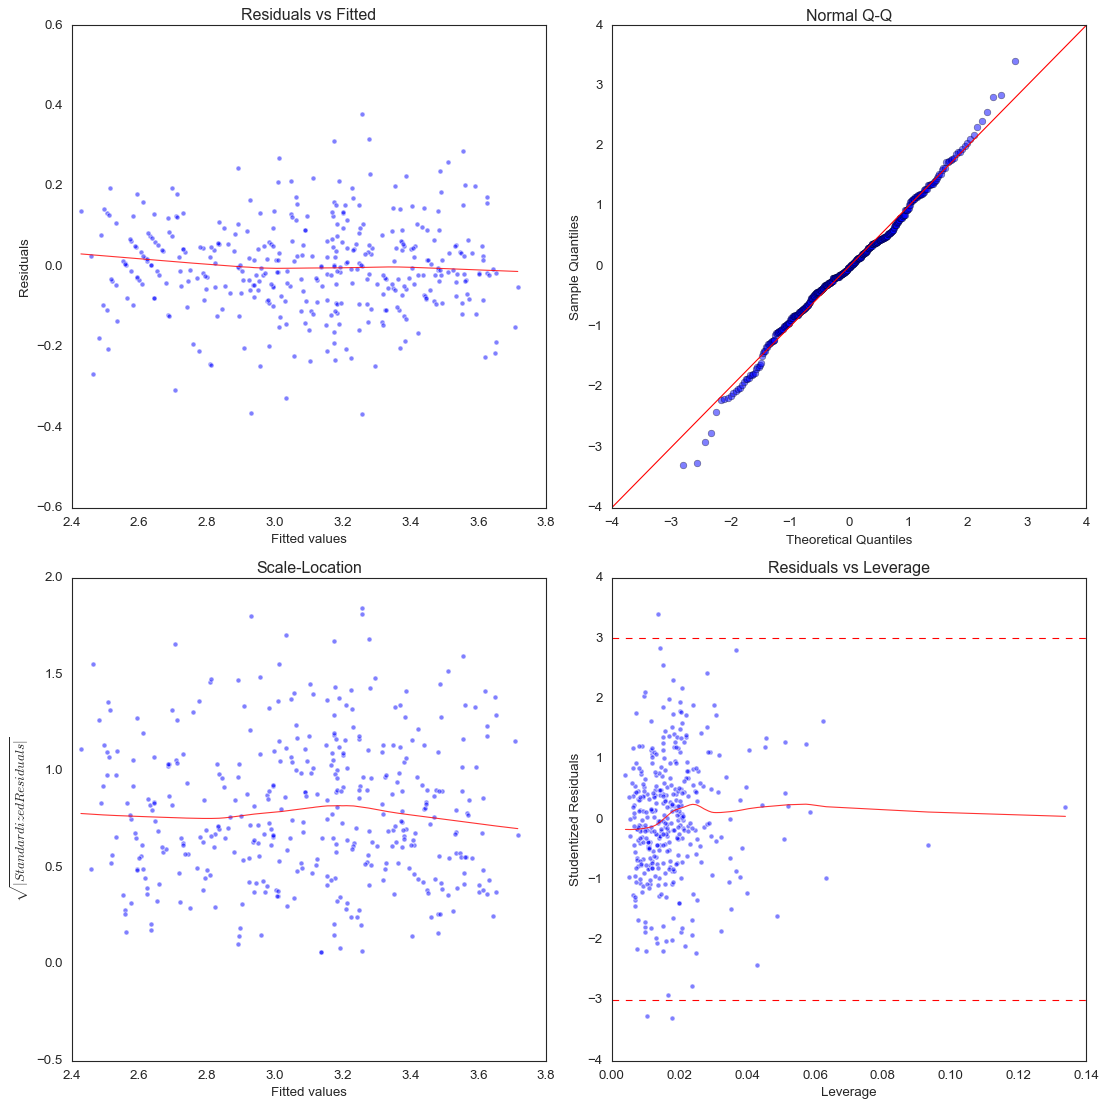

In [116]:
diagnostic_plots(results_int)

### 10. This question should be answered using the Carseats data set.

#### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [209]:
path = Path('Data/Carseats.csv')
data = pd.read_csv(path)
Seats = data
Seats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [210]:
# Convert categorical values
Seats["Urban"] = Seats["Urban"].astype('category')
Seats["US"] = Seats["US"].astype('category')
Seats["Urban"] = Seats["Urban"].cat.codes
Seats["US"] = Seats["US"].cat.codes
Seats["ShelveLoc"] = Seats["ShelveLoc"].map({'Bad':1, 'Medium':2, 'Good':3})

In [211]:
Y = Seats[['Sales']]
X = sm.add_constant(Seats)

results_1 = sm.OLS(Y, X[['Price', 'Urban', 'US', 'const']]).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.39e-23
Time:                        14:58:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
const         13.0435      0.651     20.036      0.000      11.764      14.323
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

* If prices rise with 1 unit (e.g. 1 USD), on average, the sales will decrease with 54 units (sales are in thousands units).
* If the store is located in the US, then sales will increase 1200 units.
* There does not seem to be significant relationship between Sales and wheter the store is in an urban or rural relationship.

#### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$\hat{y} = 13.0435 + (-0.0219 \times Urban) + (1.2006 \times US) + (-0.0545 \times Price) $

Where Urban and US are encoded as dummy variables:

- Urban: Yes => 1
- Urban:No   => 0
- US: Yes    => 1
- US: No     => 0

#### (d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

Price and US seems significant, therefore the null hypothesis can be rejected for these variables

#### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [212]:
results_2 = sm.OLS(Y, X[['const', 'Price', 'US']]).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.66e-24
Time:                        14:58:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (f) How well do the models in (a) and (e) fit the data?

Both model are only able to explain ~24% of the variance in dependent variable caused by the predictors.

### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [217]:
results_2.conf_int(alpha=0.05).rename(index=str, columns={0: "min.", 1: "max.",})

,min.,max.
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

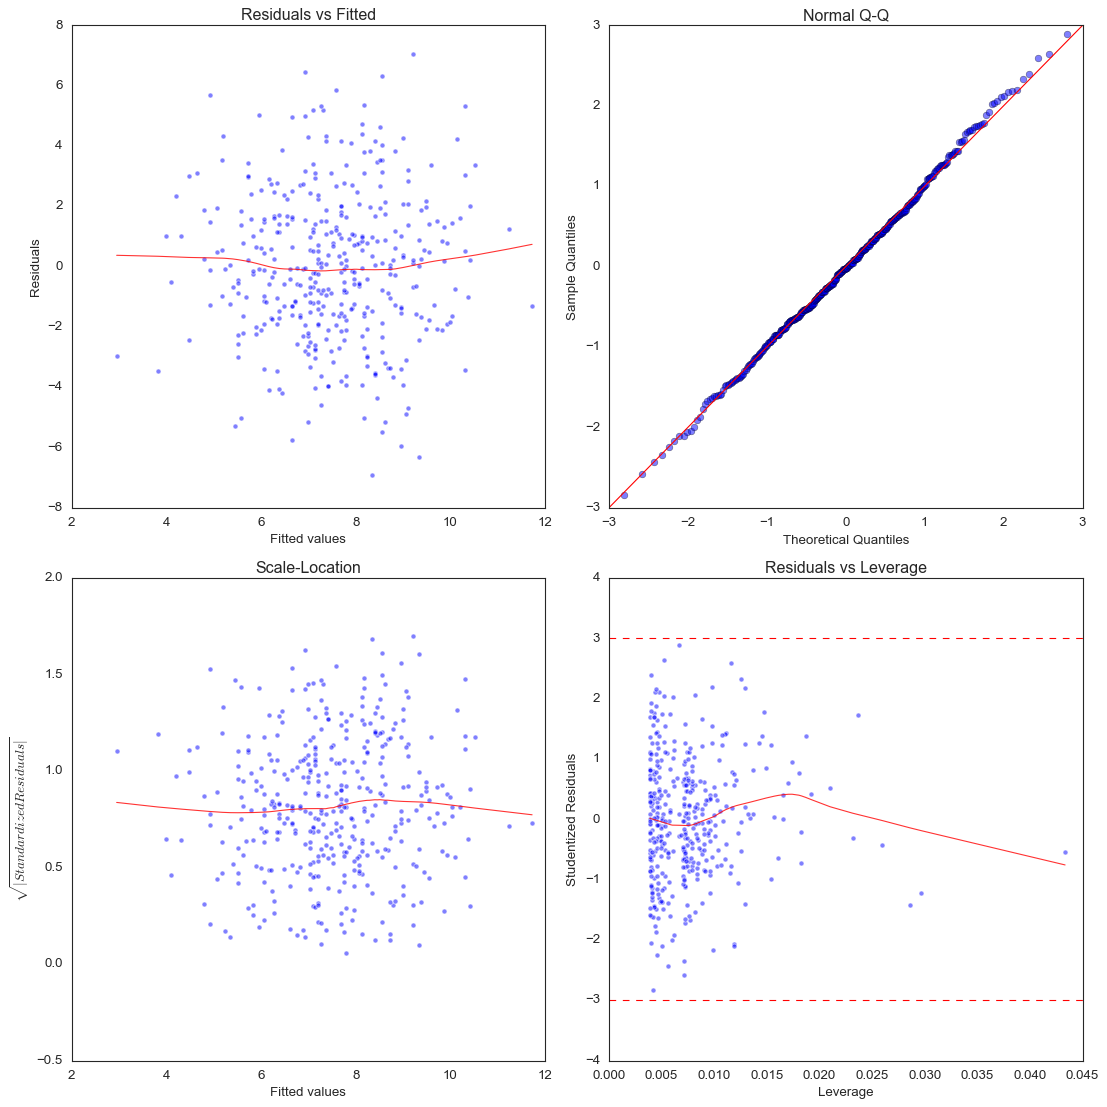

In [218]:
diagnostic_plots(results_2)

Based on the Residuals vs Leverage plots, there are few outliers near the -3 and 3 values, but non of them ex. There is one particularly high levergae point, however it is not an outlier.

## 11. In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [2]:
np.random.seed(1)
x  = np.random.normal(size=100)
y  = 2*x + np.random.normal(size=100)

#### (a) Perform a simple linear regression of y onto x, without an intercept. Report the coeﬃcient estimate ˆ β, the standard error of this coeﬃcient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0).

In [11]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Mon, 30 Aug 2021   Prob (F-statistic):                    3.46e-36
Time:                        08:03:23   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of the estimate is 2.1 with a standard error of 0.1. The estimate slightly overestimate the true value, which is 2. The p-value associated with the t-statistics of 19.8 is 0.000. Based on this results the null hypothesis can be rejected and according to the R-squared value, the variance in x can explain ~80% of the variance in y.

#### (b) Now perform a simple linear regression of x onto y without an intercept, and report the coeﬃcient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [12]:
results_2 = sm.OLS(x, y).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Mon, 30 Aug 2021   Prob (F-statistic):                    3.46e-36
Time:                        08:10:58   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of the estimate is 0.38 with a standard error of 0.02. The p-value associated with the t-statistics of 19.8 is 0.000. Based on this results the null hypothesis can be rejected and according to the R-squared value, the variance in x can explain ~80% of the variance in y.

#### (c) What is the relationship between the results obtained in (a) and (b)?

We obtain the same value for the t-statistic and consequently the same value for the corresponding p-value. Both results in (a) and (b) reflect the same line created in (a). In other words, y=2x+ε could also be written x=0.5(y−ε).

#### (e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y. 

It is easy to see that if we replace xi by yi in the formula for the t-statistic, the result would be the same.

#### (f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.

In [33]:
print('Regression y onto x:')
print(sm.OLS(y, sm.add_constant(x)).fit().tvalues)
print('Regression x onto y:')
print(sm.OLS(x, sm.add_constant(y)).fit().tvalues)

Regression y onto x:
[ 1.56434675 19.78258532]
Regression x onto y:
[-1.08955945 19.78258532]


### 12. This problem involves simple linear regression without an intercept. 

#### (a) Recall that the coeﬃcient estimate ˆ β for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coeﬃcient estimate for the regression of X onto Y the same as the coeﬃcient estimate for the regression of Y onto X

When,<br> $\sum_{i=1}^{n} x_i = \sum_{i=1}^{n} y_i$

#### (b) Generate an example in R with n = 100 observations in which the coeﬃcient estimate for the regression of X onto Y is diﬀerent from the coeﬃcient estimate for the regression of Y onto X.

In [63]:
np.random.seed(2)
x = np.random.normal(size=100)
y = 1.2*x

#### (c) Generate an example in R with n = 100 observations in which the coeﬃcient estimate for the regression of X onto Y is the same as the coeﬃcient estimate for the regression of Y onto X.

In [64]:
x = np.random.normal(size=100)
y = x

### 13. In this exercise you will create some simulated data and will ﬁt simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

#### (a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [65]:
np.random.seed(10)
x  = np.random.normal(size=100)

#### (b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [66]:
eps  = np.random.normal(size=100, loc = 0.0, scale = 0.25)

#### (c) Using x and eps, generate a vector y according to the model. What is the length of the vector y? What are the values of β0 and β1 in this linear model?

β0 = -1 and β1 = 0.5

In [67]:
y = -1 + 0.5*x + eps

In [68]:
print('y length: ' + str(np.linalg.norm(y)))

y length: 10.950837026297025


#### (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

Text(0, 0.5, 'Y')

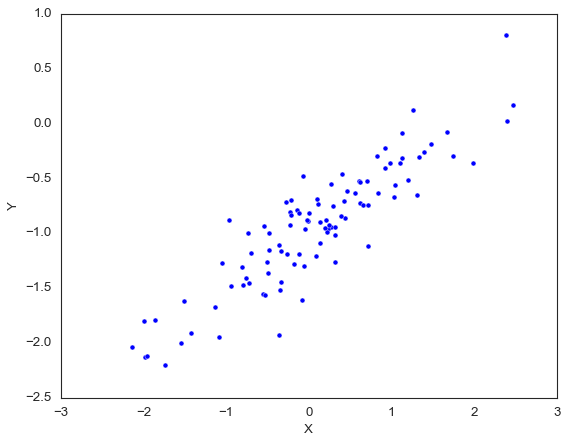

In [69]:
sns.scatterplot(x, y)
plt.xlabel("X")
plt.ylabel("Y")

# Linear relationship can be observed.

#### (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do ˆ β0 and ˆ β1 compare to β0 and β1? 

In [70]:
x_c = sm.add_constant(x)
results = sm.OLS(y,x_c).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     404.7
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.43e-36
Time:                        08:00:36   Log-Likelihood:                -1.5749
No. Observations:                 100   AIC:                             7.150
Df Residuals:                      98   BIC:                             12.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9840      0.025    -39.496      0.000      -1.033      -0.935
x1             0.5166      0.026     20.118      0.000       0.466       0.568
==============================================================================
Omnibus:                        1.136   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.642
Skew:                          -0.118   Prob(JB):                        0.725
Kurtosis:                       3.313   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The relationship seems significant with small p-values. Based on the R-squared of 0.805, about 80% of the variance in y can be explained with x. 

$\hat{β_0} = -0.9632$  
$\hat{β_1} = 0.5239$

The model estimates parameters are close to the true values. The intercept is overestimated and the gradient is overestimated.

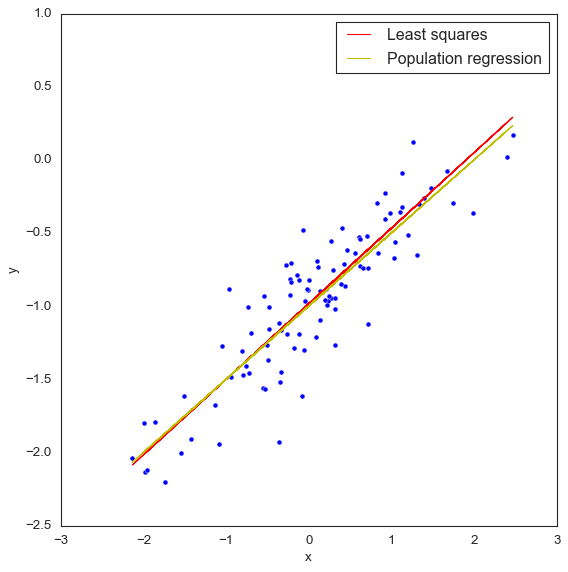

In [71]:
y_pred = results.predict()
y_act  = -1+(0.5*x)

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y_pred, color='r')
ax.plot(x, y_act, color='y')
ax.legend(['Least squares', 'Population regression']);

#### (g) Now ﬁt a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model ﬁt? Explain your answer.

In [72]:
x_c2 = pd.DataFrame({'const': x_c[:,0], 'x': x_c[:,1], 'x^2': np.square(x_c[:,1])})

,const,x,x^2
0,1.0,1.331587,1.773123
1,1.0,0.715279,0.511624
2,1.0,-1.545400,2.388262
3,1.0,-0.008384,0.000070
4,1.0,0.621336,0.386058
...,...,...,...
95,1.0,0.918269,0.843218
96,1.0,-0.482093,0.232414
97,1.0,0.089588,0.008026
98,1.0,0.826999,0.683927


In [74]:
results_2 = sm.OLS(y,x_c2).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     200.6
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           3.41e-35
Time:                        08:01:05   Log-Likelihood:                -1.5116
No. Observations:                 100   AIC:                             9.023
Df Residuals:                      97   BIC:                             16.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9781      0.030    -32.341      0.000      -1.038      -0.918
x              0.5177      0.026     19.923      0.000       0.466       0.569
x^2           -0.0064      0.018     -0.350      0.727      -0.043       0.030
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                0.850
Skew:                          -0.115   Prob(JB):                        0.654
Kurtosis:                       3.389   Cond. No.                         2.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for x^2 is not significant as its p-value is higher than 0.05. So there is not sufficient evidence that the quadratic term improves the model. Also, R-squared stays the same and the coefficient of x^2 is very small compared to the coefficient of x.

#### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results

In [77]:
eps2  = np.random.normal(size=100, loc = 0.0, scale = 0.1)
y2 = -1 + 0.5*x + eps2

results3 = sm.OLS(y2,x_c).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2748.
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.68e-73
Time:                        08:08:16   Log-Likelihood:                 95.692
No. Observations:                 100   AIC:                            -187.4
Df Residuals:                      98   BIC:                            -182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9927      0.009   -105.394      0.000      -1.011      -0.974
x1             0.5089      0.010     52.421      0.000       0.490       0.528
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.121
Skew:                          -0.085   Prob(JB):                        0.941
Kurtosis:                       2.983   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

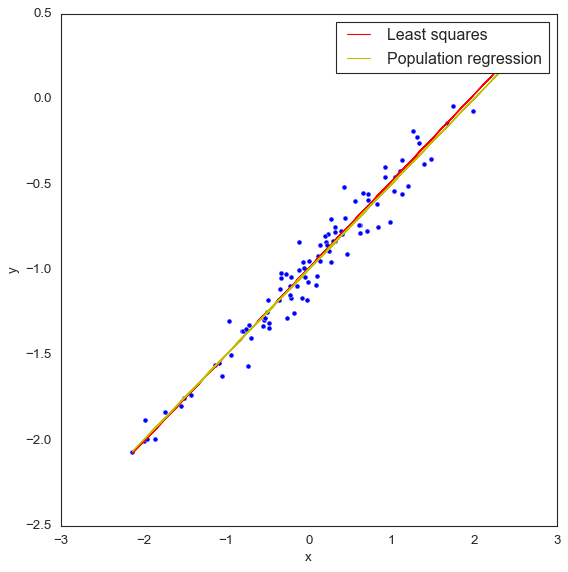

In [78]:
y_pred2 = results3.predict()
y_act  = -1+(0.5*x)

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y2)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y_pred2, color='r')
ax.plot(x, y_act, color='y')
ax.legend(['Least squares', 'Population regression']);

We reduced the noise by decreasing the variance of the normal distribution used to generate the error term ε. We may see that the coefficients are very close to the previous ones, but now, as the relationship is nearly linear, we have a much higher R2. The better fit can be seen in reduced disparity between the least squares line and the population regression line in th eplot above.

#### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

In [81]:
eps3  = np.random.normal(size=100, loc = 0.0, scale = 0.5)
y3 = -1 + 0.5*x + eps3

results4 = sm.OLS(y3,x_c).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     94.37
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           5.04e-16
Time:                        08:15:09   Log-Likelihood:                -65.926
No. Observations:                 100   AIC:                             135.9
Df Residuals:                      98   BIC:                             141.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0324      0.047    -21.774      0.000      -1.127      -0.938
x1             0.4747      0.049      9.714      0.000       0.378       0.572
==============================================================================
Omnibus:                        0.562   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.311
Skew:                           0.131   Prob(JB):                        0.856
Kurtosis:                       3.080   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

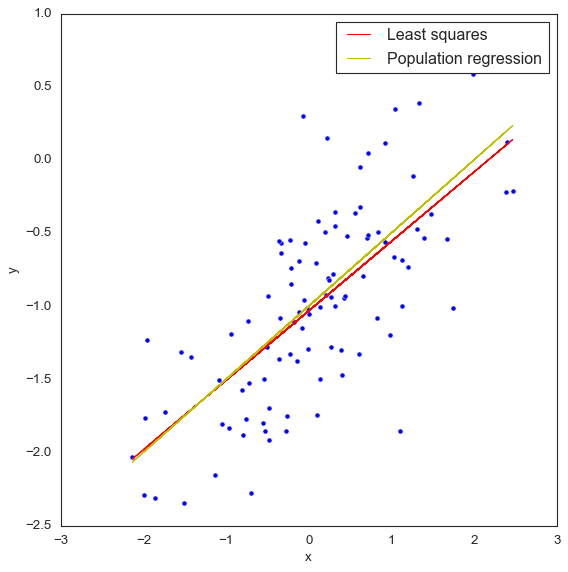

In [82]:
y_pred3 = results4.predict()
y_act  = -1+(0.5*x)

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y3)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, y_pred3, color='r')
ax.plot(x, y_act, color='y')
ax.legend(['Least squares', 'Population regression']);

Increasing the variance in the dataset has increased the error in our model. This is reflected by a reduction in R-squared and an increased disparity between the least squares line and the true population regression line.

#### (j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [93]:
print("Model with error variance of 0.25")
pd.DataFrame({'0.025':results.conf_int(alpha=0.05)[:,0], '0.975':results.conf_int(alpha=0.05)[:,1]}, index=['const', 'x'])

Model with error variance of 0.25


,0.025,0.975
const,-1.033459,-0.934576
x,0.465622,0.567532


In [94]:
print("Model with error variance of 0.1")
pd.DataFrame({'0.025':results3.conf_int(alpha=0.05)[:,0], '0.975':results3.conf_int(alpha=0.05)[:,1]}, index=['const', 'x'])

Model with error variance of 0.1


,0.025,0.975
const,-1.01144,-0.974055
x,0.48963,0.528159


In [95]:
print("Model with error variance of 0.5")
pd.DataFrame({'0.025':results4.conf_int(alpha=0.05)[:,0], '0.975':results4.conf_int(alpha=0.05)[:,1]}, index=['const', 'x'])

Model with error variance of 0.5


,0.025,0.975
const,-1.126534,-0.938345
x,0.377742,0.571693


All intervals seem to be centered on approximately 0.5. As the variance in noise increases, the confidence intervals widen.

### 14. This problem focuses on the collinearity problem

(a) Perform the following commands in R:


In [115]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.normal(size=100, loc=0.0, scale=1.0)/10
y  = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100, loc=0.0, scale=1.0)


Form of the linear model is:

$\hat{y} = β_0 + β_1 x_1 + β_2 x_2 + ɛ$

Where the coefficients are:

$β_0 = 2$  
$β_1 = 2$  
$β_2 = 0.3$  

#### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [118]:
print('Correlation coefficient: ' + str(np.corrcoef(x1, x2)[0][1]))

Correlation coefficient: 0.8390596222844917


Text(0, 0.5, 'x2')

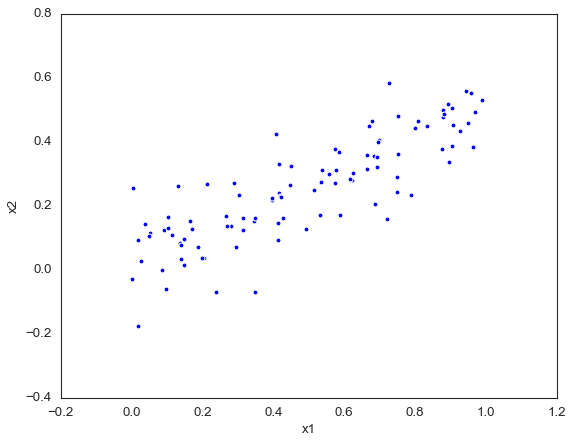

In [117]:
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')

#### (c) Using this data, ﬁt a least squares regression to predict y using x1 and x2. Describe the results obtained. What are ˆ β0, ˆ β1, and ˆ β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [121]:
X = pd.DataFrame({'x1': x1, 'x2': x2})
X = sm.add_constant(X)

results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           4.40e-07
Time:                        08:48:55   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$β_0 = 2$  
$β_1 = 2$  
$β_2 = 0.3$ 

$\hat{β_0} = 2.1893$  
$\hat{β_1} = 0.7046$  
$\hat{β_2} = 2.5024$ 

- The intercept $\hat{β_0}$ is estimated fairly accurately.
- $\hat{β_1}$ and $\hat{β_2}$ are not well estimated. It's almost as though our model has got these the wrong way around.
- we **cannot** reject the null hypothesis for $\hat{β_1}$
- we **can** reject the null hypothesis for $\hat{β_2}$

#### (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

In [127]:
results2 = sm.OLS(y,X[['const', 'x1']]).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           6.68e-07
Time:                        08:54:02   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$β_0 = 2$  
$β_1 = 2$  

$\hat{β_0} = 2.2486$  
$\hat{β_1} = 1.8770$  

- Using only x1 our model makes a much improved prediction of the x1 coefficient $\hat{β_1}$. 
- The p-value now suggests we can reject the null hypothesis H0 :β1 =0 

#### (e) Now ﬁt a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [131]:
results3 = sm.OLS(y,X[['const', 'x2']]).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.09e-07
Time:                        08:59:16   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$β_0 = 2$  
$β_2 = 0.3$  

$\hat{β_0} = 2.2655$  
$\hat{β_2} = 3.5613$  

Our model overestimates the coefficient. The p-value suggests we can reject the null hypothesis H0 :β2 =0. 

#### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

Yes. We get contradictory results for the p-value associated with $β_1$, which in results c woul cause us to accept the null hypothesis and in d) we would reject it.

This contradiction can be explained by the collinearity of x1 and x2 which causes an increased standard error for all $β_j$ when our model incorporates both features, which in turn increases the p-values and causes us to incorrectly accept the null hypothesis $H0 :β_1 =0$ when our model uses both features.


#### (g) Now suppose we obtain one additional observation, which was unfortunately mismeasured. Re-ﬁt the linear models from (c) to (e) using this new data. What eﬀect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [143]:
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data2 = data.append({'x1': 0.1, 'x2': 0.8, 'y': 6}, ignore_index=True)
data2 = sm.add_constant(data2)

In [144]:
results1 = sm.OLS(data2['y'], data2[['const', 'x1', 'x2']]).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           5.51e-08
Time:                        09:12:10   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1996      0.199     11.041      0.000       1.804       2.595
x1             0.2200      0.520      0.423      0.673      -0.812       1.252
x2             3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

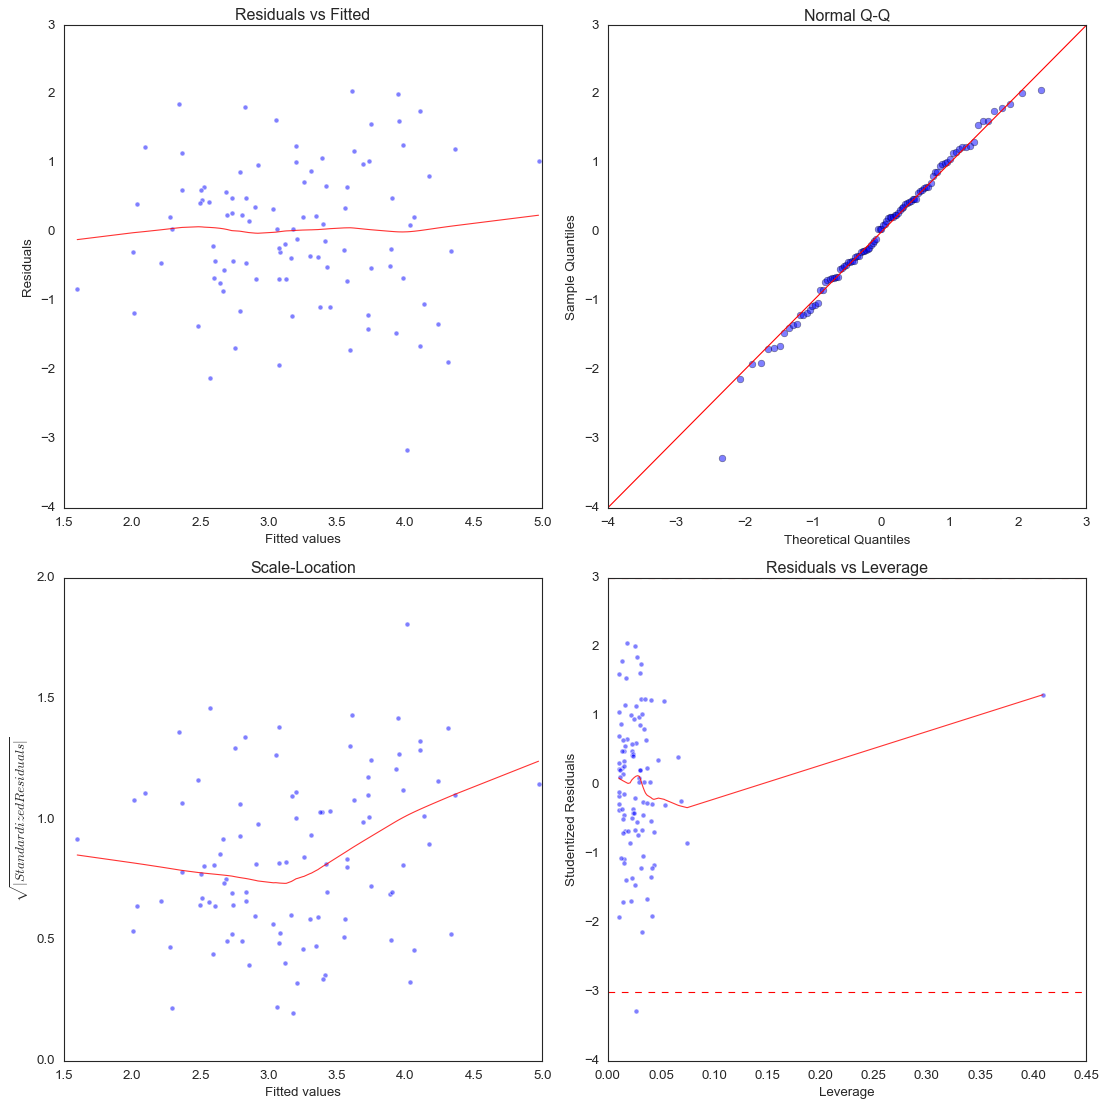

In [148]:
diagnostic_plots(results1)

In [145]:
results2 = sm.OLS(data2['y'], data2[['const', 'x1']]).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           9.15e-06
Time:                        09:12:12   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

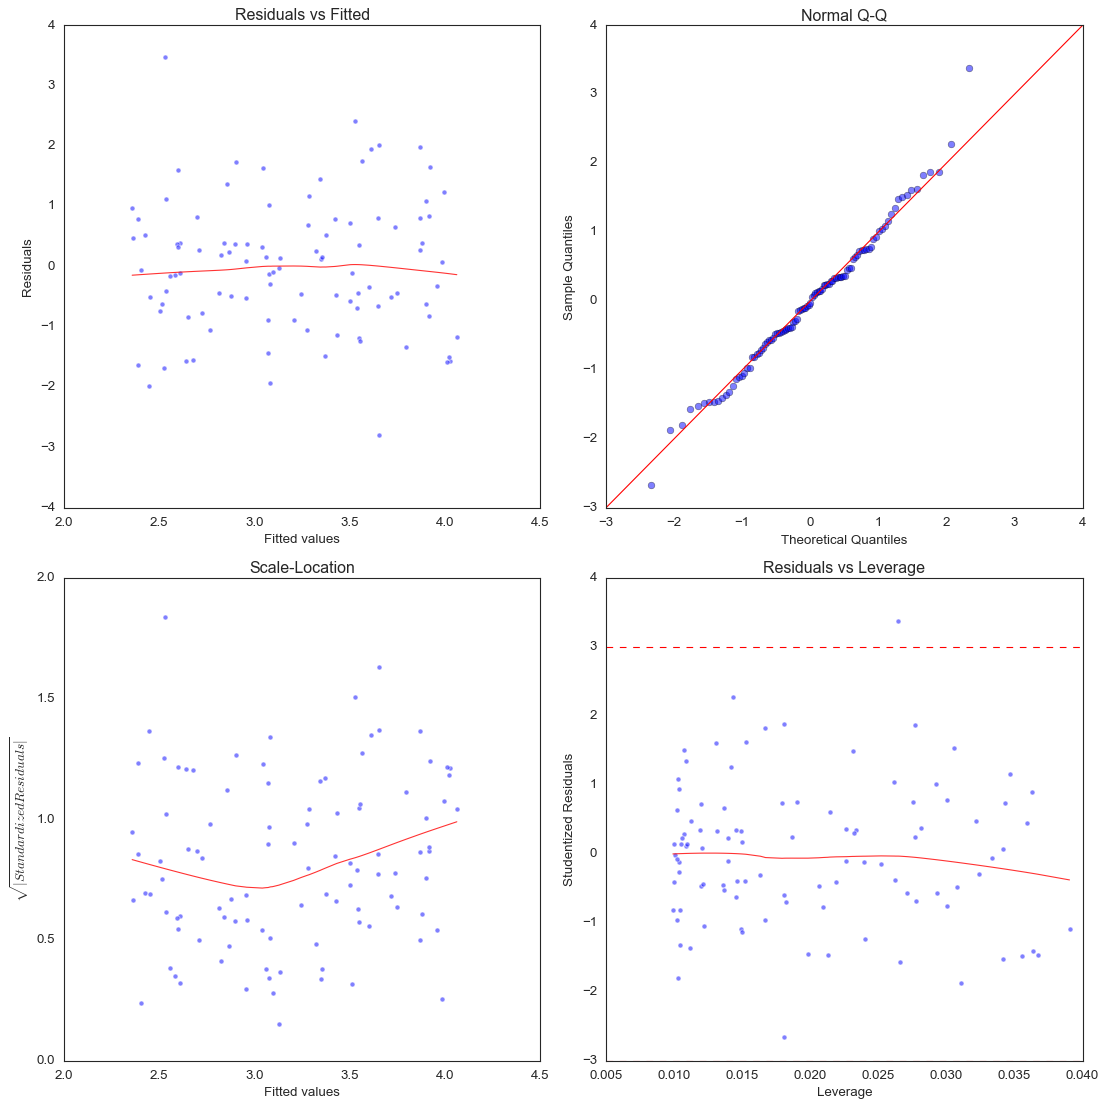

In [149]:
diagnostic_plots(results2)

In [146]:
results3 = sm.OLS(data2['y'], data2[['const', 'x2']]).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           7.41e-09
Time:                        09:12:14   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2331      0.182     12.271      0.000       1.872       2.594
x2             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

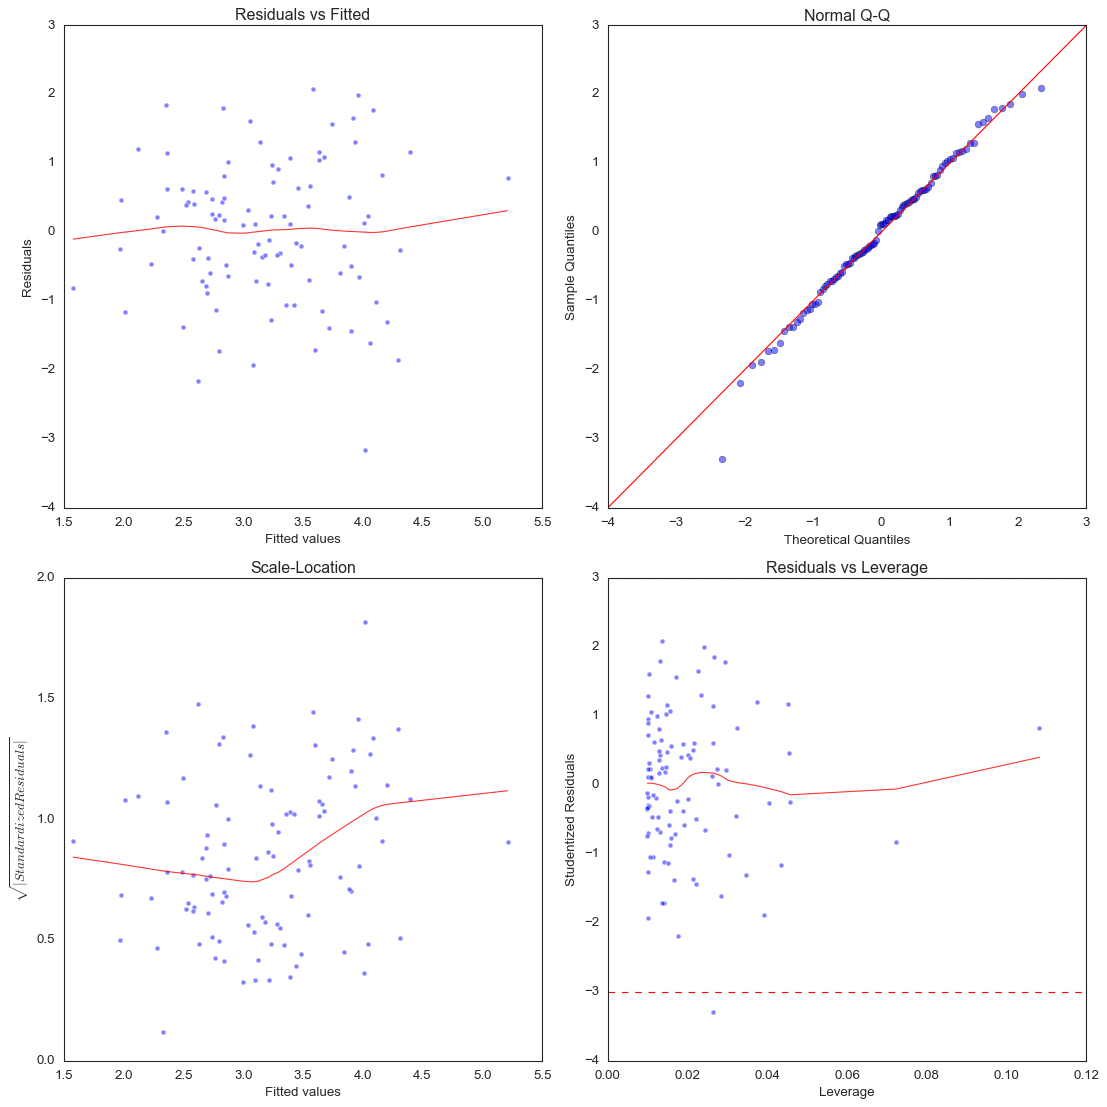

In [150]:
diagnostic_plots(results3)

* results1 : the anomaly is almost an outlier, it is very high leverage
* results2 : the anomaly is an outlier but not particularly high leverage
* results3 : the anomaly is not an outlier but is fairly high leverage


The anomaly has a detrimental effect on results1, as a high levarage outlier. It has a less detrimental effect on results2 and results3 where it is either low leverage or not an outlier.
This suggests that models with collinear features are less robust in context of anomalous observations.

### 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

#### (a) For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? Create some plots to back up your assertions.

In [152]:
path = Path('Data/Boston.csv')
Boston = pd.read_csv(path)
Boston.head()
data = sm.add_constant(Boston)

In [188]:
models_a = [sm.OLS(data['crim'], data[col]).fit()
            for col in data.columns.drop('crim')]

for model in models_a:
    dp = 4
    display(pd.DataFrame({'coef':    np.around(model.params, dp),
                          'std_err': np.around(model.bse, dp),
                          't':       np.around(model.params / model.bse, dp),
                          'P>|t|':   np.around(model.pvalues, dp),
                          '[0.025':  np.around(model.conf_int(alpha=0.05)[0], dp),
                          '0.975]':  np.around(model.conf_int(alpha=0.05)[1], dp)}))

,coef,std_err,t,P>|t|,[0.025,0.975]
const,3.6135,0.3824,9.45,0.0,2.8623,4.3648


,coef,std_err,t,P>|t|,[0.025,0.975]
zn,0.0014,0.016,0.0861,0.9314,-0.0301,0.0328


,coef,std_err,t,P>|t|,[0.025,0.975]
indus,0.3754,0.027,13.919,0.0,0.3224,0.4284


,coef,std_err,t,P>|t|,[0.025,0.975]
chas,1.8517,1.5751,1.1756,0.2403,-1.2429,4.9462


,coef,std_err,t,P>|t|,[0.025,0.975]
nox,7.5467,0.6505,11.6017,0.0,6.2688,8.8247


,coef,std_err,t,P>|t|,[0.025,0.975]
rm,0.5348,0.0611,8.7493,0.0,0.4147,0.6549


,coef,std_err,t,P>|t|,[0.025,0.975]
age,0.0606,0.0049,12.3631,0.0,0.051,0.0703


,coef,std_err,t,P>|t|,[0.025,0.975]
dis,0.3638,0.0942,3.8617,0.0001,0.1787,0.549


,coef,std_err,t,P>|t|,[0.025,0.975]
rad,0.487,0.0237,20.5508,0.0,0.4405,0.5336


,coef,std_err,t,P>|t|,[0.025,0.975]
tax,0.0119,0.0008,15.3156,0.0,0.0104,0.0134


,coef,std_err,t,P>|t|,[0.025,0.975]
ptratio,0.2088,0.0203,10.2835,0.0,0.1689,0.2486


,coef,std_err,t,P>|t|,[0.025,0.975]
black,0.0073,0.0011,6.7486,0.0,0.0052,0.0094


,coef,std_err,t,P>|t|,[0.025,0.975]
lstat,0.3491,0.024,14.567,0.0,0.302,0.3962


,coef,std_err,t,P>|t|,[0.025,0.975]
medv,0.0857,0.0166,5.16,0.0,0.0531,0.1184


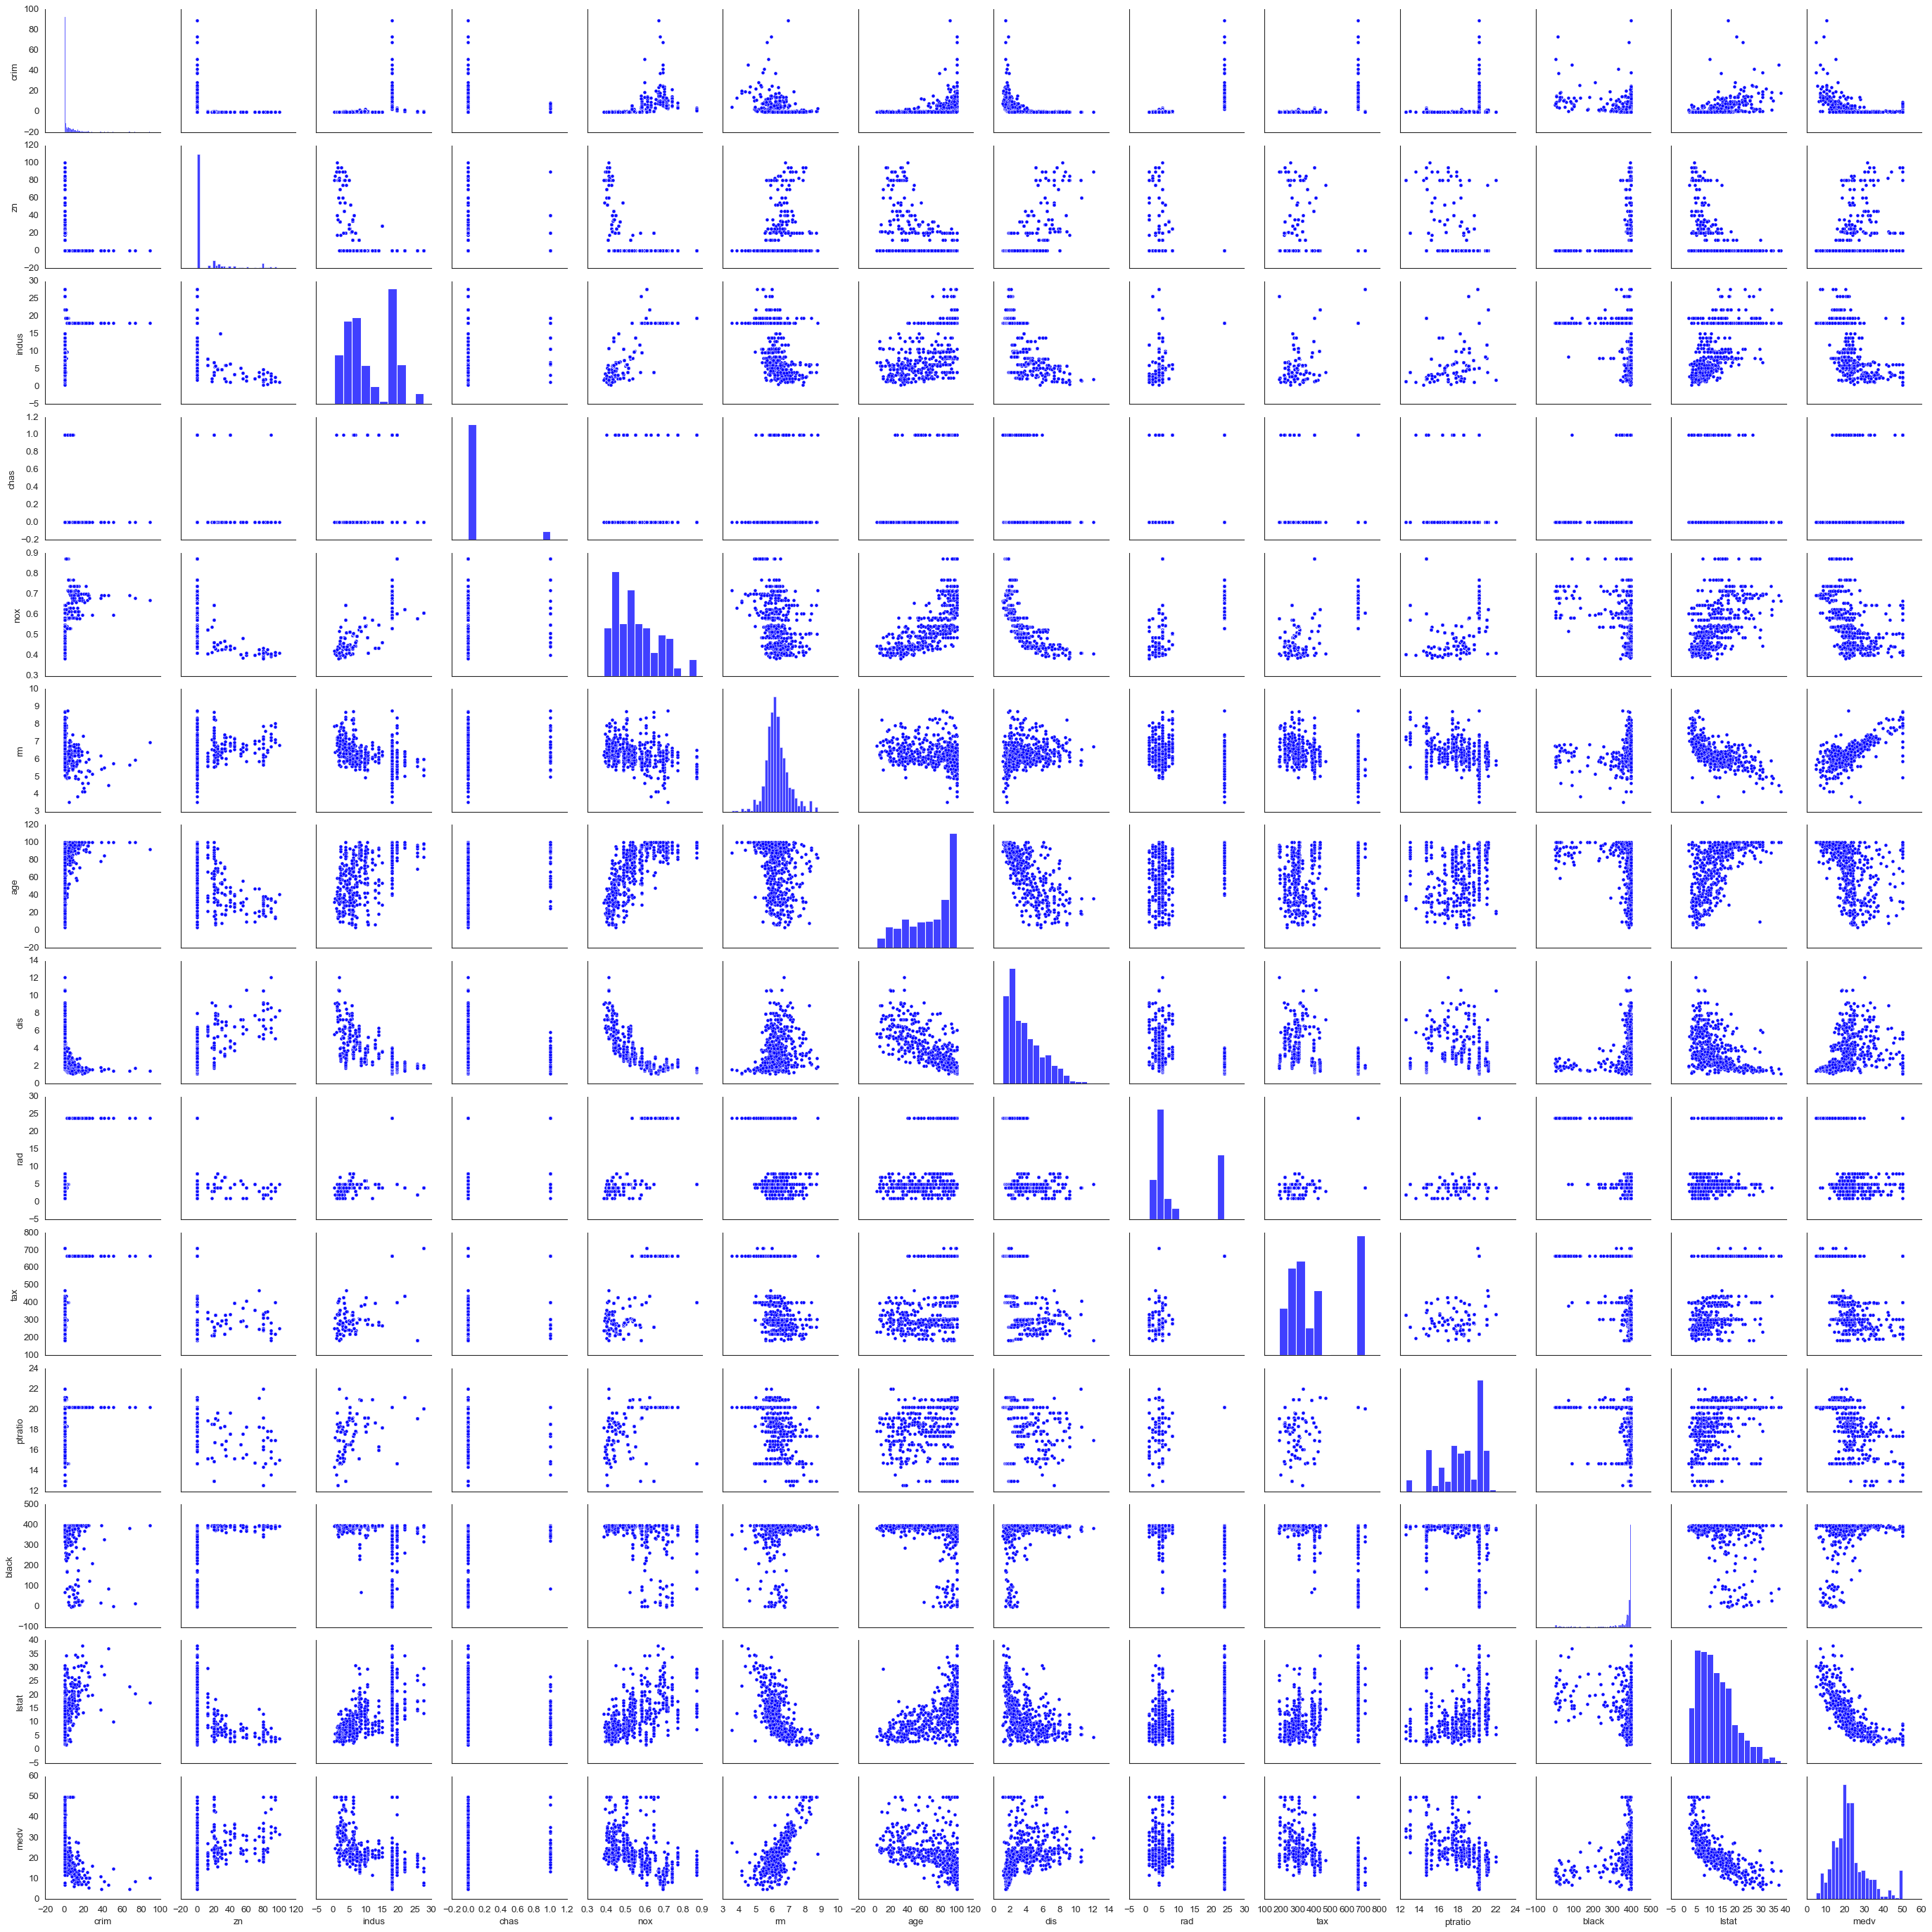

In [189]:
sns.pairplot(Boston)

#### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [196]:
results_ml = sm.OLS(data['crim'], data.drop('crim', axis=1)).fit()
results_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.57e-56
Time:                        09:43:02   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
results_ml.pvalues[results_ml.pvalues < 0.05]

const    1.894909e-02
zn       1.702489e-02
dis      5.022039e-04
rad      6.460451e-11
black    4.070233e-02
medv     1.086810e-03
dtype: float64